In [45]:
!pip install geopandas
!pip install mapclassify
!pip install shapefile
import pandas as pd
import geopandas as gpd
import mapclassify as mc
from shapely.geometry import Point
import csv
import math

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement shapefile (from versions: none)
ERROR: No matching distribution found for shapefile


## Analyse uber trip data

In [3]:
trip_data = pd.read_csv('trip_data.csv');
trip_data.head()

,sourceid,dstid,month,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time
0,29,176,10,3394.66,876.66,3249.51,1.39
1,28,186,10,2004.55,612.01,1927.05,1.31
2,10,107,11,2755.19,1096.88,2542.18,1.50
3,183,10,12,4405.46,1499.78,4160.93,1.42
4,58,71,12,1470.92,669.77,1363.36,1.45


In [4]:
trip_data.dtypes

sourceid                                      int64
dstid                                         int64
month                                         int64
mean_travel_time                            float64
standard_deviation_travel_time              float64
geometric_mean_travel_time                  float64
geometric_standard_deviation_travel_time    float64
dtype: object

In [5]:
df1 = trip_data['dstid'].value_counts().to_dict()
print(df1)

{16: 594, 85: 594, 79: 594, 131: 594, 58: 594, 132: 594, 101: 594, 76: 594, 94: 594, 7: 594, 40: 594, 66: 594, 88: 594, 47: 594, 186: 594, 48: 594, 89: 594, 84: 594, 45: 594, 170: 594, 8: 594, 50: 594, 100: 594, 13: 594, 14: 594, 15: 594, 140: 594, 82: 594, 91: 594, 55: 594, 137: 594, 157: 594, 134: 594, 155: 594, 139: 594, 93: 594, 158: 594, 26: 594, 54: 594, 154: 594, 125: 593, 75: 593, 41: 593, 166: 593, 90: 593, 68: 593, 138: 593, 193: 593, 81: 593, 135: 593, 86: 592, 49: 592, 80: 592, 189: 592, 196: 592, 171: 592, 69: 591, 197: 591, 10: 591, 102: 591, 124: 591, 182: 591, 123: 591, 160: 591, 9: 591, 59: 590, 96: 590, 106: 590, 150: 590, 194: 590, 159: 590, 126: 589, 77: 589, 78: 589, 161: 589, 99: 589, 22: 589, 24: 589, 27: 589, 151: 589, 175: 589, 167: 589, 52: 588, 156: 588, 109: 588, 11: 587, 53: 587, 136: 587, 71: 587, 162: 587, 113: 586, 23: 586, 164: 586, 74: 586, 6: 586, 3: 585, 108: 585, 148: 585, 118: 585, 198: 585, 128: 585, 174: 585, 120: 585, 105: 585, 165: 584, 190: 58

## Count no of trips happened and count no of places nearby a parking lot

In [6]:

file_name ='dest_freq.csv'
with open('dest_freq.csv', 'w', newline='') as f:
    # Create a CSV writer object
    writer = csv.writer(f)
    # Write one key-value tuple per row
    for row in df1.items():
        writer.writerow(row)

In [29]:
dest_freq = pd.read_csv('dest_freq.csv');
dest_freq.head()

,WARD_NO,FREQ
0,158,452
1,102,449
2,157,449
3,89,448
4,140,448


In [30]:
dest_freq.dtypes

WARD_NO    int64
FREQ       int64
dtype: object

In [31]:
geoJSON_df = gpd.read_file('bangalore_wards.json')

In [32]:
geoJSON_df.tail()

,WARD_NO,WARD_NAME,MOVEMENT_ID,DISPLAY_NAME,geometry
193,172,Madivala,194,"0 1st B Cross Road, Cashier Layout, 1st Stage,...","MULTIPOLYGON (((77.61399 12.92347, 77.61419 12..."
194,26,Ramamurthy Nagar,195,"Kalkere-Agara Main Road, Horamavu Agara, Kalke...","MULTIPOLYGON (((77.68336 13.05192, 77.68384 13..."
195,25,Horamavu,196,"0 Horamavu Agara Main Road, 1st Block, Mallapp...","MULTIPOLYGON (((77.64931 13.07853, 77.64993 13..."
196,86,Marathahalli,197,"0 3rd Cross Road, Manjunatha Layout, Marathaha...","MULTIPOLYGON (((77.68549 12.94121, 77.68539 12..."
197,198,Hemmigepura,198,"BGS Road, Kodipalya, Bengaluru","MULTIPOLYGON (((77.49854 12.92574, 77.49854 12..."


In [33]:
geoJSON_df.dtypes

WARD_NO           object
WARD_NAME         object
MOVEMENT_ID       object
DISPLAY_NAME      object
geometry        geometry
dtype: object

In [34]:
geoJSON_df['WARD_NO']=geoJSON_df['WARD_NO'].astype(int)

In [35]:
final_df = pd.merge(geoJSON_df, dest_freq, on='WARD_NO')
final_df.head()

,WARD_NO,WARD_NAME,MOVEMENT_ID,DISPLAY_NAME,geometry,FREQ
0,2,Chowdeswari Ward,1,"Unnamed Road, Bengaluru","MULTIPOLYGON (((77.59229 13.09720, 77.59094 13...",427
1,3,Atturu,2,"9th Cross Bhel Layout, Adityanagar, Vidyaranya...","MULTIPOLYGON (((77.56862 13.12705, 77.57064 13...",445
2,4,Yelahanka Satellite Town,3,"15th A Cross Road, Yelahanka Satellite Town, Y...","MULTIPOLYGON (((77.59094 13.09842, 77.59229 13...",428
3,51,Vijnanapura,4,"SP Naidu Layout 4th Cross Street, SP Naidu Lay...","MULTIPOLYGON (((77.67683 13.01147, 77.67695 13...",433
4,53,Basavanapura,5,"Medahalli Kadugodi Road, Bharathi Nagar, Krish...","MULTIPOLYGON (((77.72899 13.02061, 77.72994 13...",439


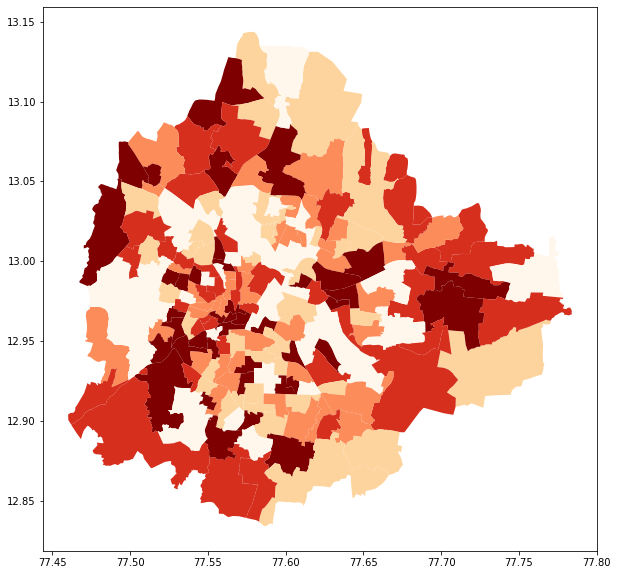

In [36]:
final_df.plot(figsize=(12,10),column='FREQ',cmap='OrRd', scheme='quantiles')

In [37]:
trip_freq = pd.read_csv('dest_freq.csv');
trip_freq.tail()

,WARD_NO,FREQ
193,127,342
194,119,305
195,60,288
196,72,267
197,63,201


In [38]:
def df_to_gdf(df):
    """takes a dataframe with columns named 'longitude' and 'latitude' 
    to transform to a geodataframe with point features"""
    
    df['coordinates'] = df[['longitude', 'latitude']].values.tolist()
    df['coordinates'] = df['coordinates'].apply(Point)
    df = gpd.GeoDataFrame(df, geometry = 'coordinates')
    return df

In [39]:
parking_df = pd.read_csv('parking.csv');
parking_df.head()

,Name,ID,Vicinity,latitude,longitude,Rating,Url
0,BBMP Parking Space,ChIJ_ai2SuYVrjsRYEPrdzFxh7E,"14/21, Siddaiah Rd, Vinobha Nagar, Sudhama Nag...",12.956836,77.581783,3.1,https://www.google.com/maps/place/?q=place_id:...
1,Shanti Nagar parking,ChIJWaLM37AVrjsRivlbh9NwR0o,"BLOCK-A, Double Rd, Next Big Bazar, NGO Colony...",12.954053,77.591901,4.0,https://www.google.com/maps/place/?q=place_id:...
2,BDA Complex Parking,ChIJ7VYXtlsUrjsRXghoSce9Cfw,"WJJF+52F, 6th Cross Rd, Koramangala 3 Block, K...",12.930442,77.622537,3.6,https://www.google.com/maps/place/?q=place_id:...
3,HAL parking lot,ChIJuccM0rMWrjsRhgG0RP5Cn0c,"XJMX+MC9, Suranjan Das Rd, Binna Mangala, New ...",12.984170,77.648606,3.6,https://www.google.com/maps/place/?q=place_id:...
4,Unity Building Parking Lot,ChIJfQCQsN8VrjsRTmw40xo6hAY,"XH7P+VP7, Sampangi Rama Nagar, Bengaluru",12.964654,77.586791,4.3,https://www.google.com/maps/place/?q=place_id:...


In [40]:
apartment_df = pd.read_csv('apartment.csv');
apartment_df.head()

,Name,ID,Vicinity,latitude,longitude,Rating,Url
0,Harmony Apartment,ChIJj7uyOwMXrjsRlfixjtHruVM,"841, New no 72/1, 2, Arabic College Main Rd, B...",13.017013,77.618294,3.9,https://www.google.com/maps/place/?q=place_id:...
1,Hilife Sunnyside Apartment,ChIJbxcZeAcTrjsRenKSS8MPBvI,"VPW2+8HG, hilife sunnyside apartment, behind R...",12.895753,77.701423,3.7,https://www.google.com/maps/place/?q=place_id:...
2,Jasmine Apartment,ChIJD0AFGL8UrjsRwYgAetiZCpI,"Jasmine Apartment Sy 33,4th cross 7th main, Ho...",12.900749,77.641483,4.1,https://www.google.com/maps/place/?q=place_id:...
3,Ashirwad Apartment,ChIJ65o90C8UrjsRQiDvCdJ5NS0,"1688, East Rd, Rose Garden, Austin Town, Neela...",12.958157,77.616454,4.4,https://www.google.com/maps/place/?q=place_id:...
4,SLS Springs Apartment,ChIJYRiavV8TrjsRwuVynHSXlFk,"Sy.121/2 & 122, Royal Placid Layout, nr. Vibgy...",12.900729,77.655330,4.5,https://www.google.com/maps/place/?q=place_id:...


In [41]:
food_court_df = pd.read_csv('food_court.csv');
food_court_df.head()

,Name,ID,Vicinity,latitude,longitude,Rating,Url
0,Vega City Mall Food Court,ChIJ-xKR7TgVrjsRI0viMM0nGUI,"WJ52+3FJ, Vega city,food court, Bannerghatta M...",12.907714,77.601137,4.3,https://www.google.com/maps/place/?q=place_id:...
1,Orion Mall Food Court,ChIJAV62v3g9rjsRT7TFt6zi4Uk,"2H63+MXJ, Rajajinagar, Bengaluru",13.011701,77.554898,4.2,https://www.google.com/maps/place/?q=place_id:...
2,Brookefield mall foodcourt,ChIJddfIyJgTrjsRqvqhJOrQ4Hw,"24, ITPL Main Rd, AECS Layout, Marathahalli, B...",12.966010,77.717927,3.8,https://www.google.com/maps/place/?q=place_id:...
3,By The Way Foodcourt,ChIJlZbc8pxsrjsReIPVE6jx_s8,"Ground Floor, Skyward TechPark, Velankani Driv...",12.848130,77.657655,4.0,https://www.google.com/maps/place/?q=place_id:...
4,Bagmane Tech Park Food Court,ChIJM4N1OFIRrjsRd4VkGHll9wA,"XMH5+R53, Krishnappa Garden, C V Raman Nagar, ...",12.979515,77.657910,4.0,https://www.google.com/maps/place/?q=place_id:...


In [42]:
gas_station_df = pd.read_csv('gas_station.csv');
gas_station_df.head()

,Name,ID,Vicinity,latitude,longitude,Rating,Url
0,Latha Prasad Fuel Station,ChIJz_-PthY_rjsRAhynqYB0Oog,"#15, Mysore Rd, opp. BWSSB Cvotros, ITI Layout...",12.938435,77.521624,3.5,https://www.google.com/maps/place/?q=place_id:...
1,Total Gas Pump,ChIJHzM6J1YVrjsRTOz53QczYic,"WJF3+C2C, 1st Main Rd, New Gurappana Palya, 1s...",12.923569,77.602530,3.2,https://www.google.com/maps/place/?q=place_id:...
2,Nayara Energy Fuel Station,ChIJzVbrlq0RrjsRrdC2C8b6LL4,"37/2, Basavanapura Main Rd, adjsent sbi batter...",13.014259,77.709777,3.7,https://www.google.com/maps/place/?q=place_id:...
3,Total Gas Station,ChIJwd4kALY9rjsRYjK4LOvzx9w,"2, Magadi Main Rd, Govindaraja Nagar Ward, Kul...",12.986323,77.522015,3.5,https://www.google.com/maps/place/?q=place_id:...
4,V R Filling Station,ChIJQZlgJ2M_rjsRQVOfK0ZYrtc,"WF5P+FWP, Kengeri, Bengaluru",12.908724,77.487326,4.2,https://www.google.com/maps/place/?q=place_id:...


In [43]:
mall_df = pd.read_csv('shopping_malls.csv');
mall_df.head()

,Name,ID,Vicinity,latitude,longitude,Rating,Url
0,Brookefield Mall,ChIJZxGsbDMSrjsRbBCEz3c7lSM,"Sy No.111 &123, 2, ITPL Main Rd, Brookefield, ...",12.966007,77.718126,3.9,https://www.google.com/maps/place/?q=place_id:...
1,Esteem Mall,ChIJvbUh-Y4XrjsREsDI5shBa0A,"Byataranyanapura, 104/6, Kempapura Main Rd, Ch...",13.049016,77.593563,3.8,https://www.google.com/maps/place/?q=place_id:...
2,Market Square Mall,ChIJ_Tef7PcUrjsRfMotlTVNUPU,"BBMP Commericial Plaza, Hosur Rd, Madiwala, Be...",12.921967,77.620252,4.0,https://www.google.com/maps/place/?q=place_id:...
3,Phoenix Marketcity,ChIJS76jBAsRrjsRQ5Yuqy0l-88,"Whitefield Main Rd, Devasandra Industrial Esta...",12.995802,77.696397,4.5,https://www.google.com/maps/place/?q=place_id:...
4,Elements Mall,ChIJxTyv4WgXrjsRiqVsTY7LFBk,"Survey No. 132(P), 133(P), & 134(P), of Nagava...",13.045096,77.626896,4.1,https://www.google.com/maps/place/?q=place_id:...


In [44]:
charging_df = pd.read_csv('charging_station.csv');
charging_df.head()

,Name,ID,Vicinity,latitude,longitude,Rating,Url
0,Zeon Charging Station,ChIJNdrWePEVrjsRIKZ5msD1RDw,"The Forum Mall, Hosur Rd, Chikku Lakshmaiah La...",12.934643,77.611305,4.7,https://www.google.com/maps/place/?q=place_id:...
1,BESCOM Charging Station,ChIJcdr133UVrjsRulTQMm27_JA,"16, 17th Main Rd, Aicobo Nagar, 1st Stage, BTM...",12.916883,77.610429,3.8,https://www.google.com/maps/place/?q=place_id:...
2,Electric Vehicle Charging Station,ChIJCV0IIuc_rjsRkB0i-7NOyfg,"XG2R+659, MM Rd, Byatarayanapura, Banashankari...",12.950538,77.540433,3.9,https://www.google.com/maps/place/?q=place_id:...
3,Porsche Destination Charging Station,ChIJRQk0XncWrjsRjhxoYmRmNxg,"0, 24, Vittal Mallya Rd, KG Halli, D' Souza La...",12.971572,77.596130,0.0,https://www.google.com/maps/place/?q=place_id:...
4,Kazam Charging Station,ChIJ3__MRoIVrjsR2ylhlqYJIMI,"No. 12, 4/2, 1 Cross, Cross, JC Rd, Journalist...",12.957084,77.581296,2.0,https://www.google.com/maps/place/?q=place_id:...


## Haversine Formula  
Haversine formula computes distance between two points on the surface of a sphere using the latitude and longitude of the two points.



*   a = sin²(Δlat/2) + cos(lat1).cos(lat2).sin²(Δlong/2)
*   c = 2.atan2(√a, √(1−a))
*   d = R.c







In [ ]:
# import math
# from math import cos, asin, sqrt

# def distance(lat1, lon1, lat2, lon2):
#     p = 0.017453292519943295 # pi/180
#     hav = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
#     return 12742 * asin(sqrt(hav))

In [46]:

def distance(lat1, lon1, lat2, lon2):

    R = 6371000
    phi_1 = math.radians(lat1)
    phi_2 = math.radians(lat2)

    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lambda / 2.0) ** 2
    
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    meters = R * c 
    km = meters / 1000.0

    km = round(km, 3)
    return km
 

In [50]:
#find number of apartments near parking lot

parking_data =[]

for index, row in parking_df.iterrows():
  count=0
  name = row['Name']
  latitude = row['latitude']
  longitude = row['longitude']
  #print('Latitude:', row['latitude'],row['longitude'])
  for index, a_row in apartment_df.iterrows():
    a_latitude = a_row['latitude']
    a_longitude = a_row['longitude']
    dis = distance(latitude,longitude,a_latitude,a_longitude)
    if(dis < 4):
      count = count + 1
  #print('Cords:', row['latitude'],row['longitude'] ,count)
  parking_data.append({'Name':row['Name'] ,'parking_id':row['ID'],'latitude':row['latitude'] , 'longitude':row['longitude'],'Apartments_nearby':count})


In [51]:
print(parking_data)

[{'Name': 'BBMP Parking Space', 'parking_id': 'ChIJ_ai2SuYVrjsRYEPrdzFxh7E', 'latitude': 12.9568355, 'longitude': 77.5817825, 'Apartments_nearby': 6}, {'Name': 'Shanti Nagar parking', 'parking_id': 'ChIJWaLM37AVrjsRivlbh9NwR0o', 'latitude': 12.9540534, 'longitude': 77.5919008, 'Apartments_nearby': 7}, {'Name': 'BDA Complex Parking', 'parking_id': 'ChIJ7VYXtlsUrjsRXghoSce9Cfw', 'latitude': 12.9304421, 'longitude': 77.6225366, 'Apartments_nearby': 8}, {'Name': 'HAL parking lot', 'parking_id': 'ChIJuccM0rMWrjsRhgG0RP5Cn0c', 'latitude': 12.9841697, 'longitude': 77.6486061, 'Apartments_nearby': 5}, {'Name': 'Unity Building Parking Lot', 'parking_id': 'ChIJfQCQsN8VrjsRTmw40xo6hAY', 'latitude': 12.964654, 'longitude': 77.586791, 'Apartments_nearby': 6}, {'Name': 'Parking Lot', 'parking_id': 'ChIJawylbtMXrjsRhw43wAmhlQw', 'latitude': 13.0129735, 'longitude': 77.5687129, 'Apartments_nearby': 6}, {'Name': 'Corporation Car Park', 'parking_id': 'ChIJ3UFDSuYVrjsRK7wEKppOxc8', 'latitude': 12.9567991

In [ ]:
import csv
data_info = ['Name', 'parking_id','latitude', 'longitude','Apartments_nearby']
with open('no_of_apartment_nearby.csv', 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames = data_info)
    writer.writeheader()
    writer.writerows(parking_data)

In [ ]:
#find number of food court near parking lot

food_data =[]

for index, row in parking_df.iterrows():
  count=0
  name = row['Name']
  latitude = row['latitude']
  longitude = row['longitude']
  #print('Latitude:', row['latitude'],row['longitude'])
  for index, a_row in food_court_df.iterrows():
    a_latitude = a_row['latitude']
    a_longitude = a_row['longitude']
    dis = distance(latitude,longitude,a_latitude,a_longitude)
    if(dis < 4):
      count = count + 1
  #print('Cords:', row['latitude'],row['longitude'] ,count)
  food_data.append({'Name':row['Name'],'parking_id':row['ID'] ,'latitude':row['latitude'] , 'longitude':row['longitude'],'Food_court_nearby':count})

In [ ]:
print(food_data)

[{'Name': 'BBMP Parking Space', 'parking_id': 'ChIJ_ai2SuYVrjsRYEPrdzFxh7E', 'latitude': 12.9568355, 'longitude': 77.5817825, 'Food_court_nearby': 5}, {'Name': 'Shanti Nagar parking', 'parking_id': 'ChIJWaLM37AVrjsRivlbh9NwR0o', 'latitude': 12.9540534, 'longitude': 77.5919008, 'Food_court_nearby': 5}, {'Name': 'BDA Complex Parking', 'parking_id': 'ChIJ7VYXtlsUrjsRXghoSce9Cfw', 'latitude': 12.9304421, 'longitude': 77.6225366, 'Food_court_nearby': 13}, {'Name': 'HAL parking lot', 'parking_id': 'ChIJuccM0rMWrjsRhgG0RP5Cn0c', 'latitude': 12.9841697, 'longitude': 77.6486061, 'Food_court_nearby': 6}, {'Name': 'Unity Building Parking Lot', 'parking_id': 'ChIJfQCQsN8VrjsRTmw40xo6hAY', 'latitude': 12.964654, 'longitude': 77.586791, 'Food_court_nearby': 6}, {'Name': 'Parking Lot', 'parking_id': 'ChIJawylbtMXrjsRhw43wAmhlQw', 'latitude': 13.0129735, 'longitude': 77.5687129, 'Food_court_nearby': 5}, {'Name': 'Corporation Car Park', 'parking_id': 'ChIJ3UFDSuYVrjsRK7wEKppOxc8', 'latitude': 12.956799

In [ ]:
data_info = ['Name','parking_id', 'latitude', 'longitude','Food_court_nearby']
with open('no_of_food_court_nearby.csv', 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames = data_info)
    writer.writeheader()
    writer.writerows(food_data)

In [ ]:
#find number of malls near parking lot

malls_data =[]

for index, row in parking_df.iterrows():
  count=0
  name = row['Name']
  latitude = row['latitude']
  longitude = row['longitude']
  #print('Latitude:', row['latitude'],row['longitude'])
  for index, a_row in mall_df.iterrows():
    a_latitude = a_row['latitude']
    a_longitude = a_row['longitude']
    dis = distance(latitude,longitude,a_latitude,a_longitude)
    if(dis < 2):
      count = count + 1
  #print('Cords:', row['latitude'],row['longitude'] ,count)
  malls_data.append({'Name':row['Name'],'parking_id':row['ID'] ,'latitude':row['latitude'] , 'longitude':row['longitude'],'Malls_nearby':count})

In [ ]:
print(malls_data)

[{'Name': 'BBMP Parking Space', 'parking_id': 'ChIJ_ai2SuYVrjsRYEPrdzFxh7E', 'latitude': 12.9568355, 'longitude': 77.5817825, 'Malls_nearby': 4}, {'Name': 'Shanti Nagar parking', 'parking_id': 'ChIJWaLM37AVrjsRivlbh9NwR0o', 'latitude': 12.9540534, 'longitude': 77.5919008, 'Malls_nearby': 2}, {'Name': 'BDA Complex Parking', 'parking_id': 'ChIJ7VYXtlsUrjsRXghoSce9Cfw', 'latitude': 12.9304421, 'longitude': 77.6225366, 'Malls_nearby': 3}, {'Name': 'HAL parking lot', 'parking_id': 'ChIJuccM0rMWrjsRhgG0RP5Cn0c', 'latitude': 12.9841697, 'longitude': 77.6486061, 'Malls_nearby': 2}, {'Name': 'Unity Building Parking Lot', 'parking_id': 'ChIJfQCQsN8VrjsRTmw40xo6hAY', 'latitude': 12.964654, 'longitude': 77.586791, 'Malls_nearby': 2}, {'Name': 'Parking Lot', 'parking_id': 'ChIJawylbtMXrjsRhw43wAmhlQw', 'latitude': 13.0129735, 'longitude': 77.5687129, 'Malls_nearby': 2}, {'Name': 'Corporation Car Park', 'parking_id': 'ChIJ3UFDSuYVrjsRK7wEKppOxc8', 'latitude': 12.9567991, 'longitude': 77.5817565, 'Ma

In [ ]:
data_info = ['Name','parking_id', 'latitude', 'longitude','Malls_nearby']
with open('no_of_malls_nearby.csv', 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames = data_info)
    writer.writeheader()
    writer.writerows(malls_data)

In [ ]:
#find number of gas station near parking lot

gas_data =[]

for index, row in parking_df.iterrows():
  count=0
  name = row['Name']
  latitude = row['latitude']
  longitude = row['longitude']
  #print('Latitude:', row['latitude'],row['longitude'])
  for index, a_row in gas_station_df.iterrows():
    a_latitude = a_row['latitude']
    a_longitude = a_row['longitude']
    dis = distance(latitude,longitude,a_latitude,a_longitude)
    if(dis < 4):
      count = count + 1
  #print('Cords:', row['latitude'],row['longitude'] ,count)
  gas_data.append({'Name':row['Name'],'parking_id':row['ID'] ,'latitude':row['latitude'] , 'longitude':row['longitude'],'Gas_station_nearby':count})

In [ ]:
print(gas_data)

[{'Name': 'BBMP Parking Space', 'parking_id': 'ChIJ_ai2SuYVrjsRYEPrdzFxh7E', 'latitude': 12.9568355, 'longitude': 77.5817825, 'Gas_station_nearby': 3}, {'Name': 'Shanti Nagar parking', 'parking_id': 'ChIJWaLM37AVrjsRivlbh9NwR0o', 'latitude': 12.9540534, 'longitude': 77.5919008, 'Gas_station_nearby': 4}, {'Name': 'BDA Complex Parking', 'parking_id': 'ChIJ7VYXtlsUrjsRXghoSce9Cfw', 'latitude': 12.9304421, 'longitude': 77.6225366, 'Gas_station_nearby': 3}, {'Name': 'HAL parking lot', 'parking_id': 'ChIJuccM0rMWrjsRhgG0RP5Cn0c', 'latitude': 12.9841697, 'longitude': 77.6486061, 'Gas_station_nearby': 2}, {'Name': 'Unity Building Parking Lot', 'parking_id': 'ChIJfQCQsN8VrjsRTmw40xo6hAY', 'latitude': 12.964654, 'longitude': 77.586791, 'Gas_station_nearby': 3}, {'Name': 'Parking Lot', 'parking_id': 'ChIJawylbtMXrjsRhw43wAmhlQw', 'latitude': 13.0129735, 'longitude': 77.5687129, 'Gas_station_nearby': 3}, {'Name': 'Corporation Car Park', 'parking_id': 'ChIJ3UFDSuYVrjsRK7wEKppOxc8', 'latitude': 12.9

In [ ]:
data_info = ['Name','parking_id', 'latitude', 'longitude','Gas_station_nearby']
with open('no_of_gas_nearby.csv', 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames = data_info)
    writer.writeheader()
    writer.writerows(gas_data)

In [ ]:
#find number of charging station near parking lot

charge_data =[]

for index, row in parking_df.iterrows():
  count=0
  name = row['Name']
  latitude = row['latitude']
  longitude = row['longitude']
  #print('Latitude:', row['latitude'],row['longitude'])
  for index, a_row in charging_df.iterrows():
    a_latitude = a_row['latitude']
    a_longitude = a_row['longitude']
    dis = distance(latitude,longitude,a_latitude,a_longitude)
    if(dis < 4):
      count = count + 1
  #print('Cords:', row['latitude'],row['longitude'] ,count)
  charge_data.append({'Name':row['Name'],'parking_id':row['ID'] ,'latitude':row['latitude'] , 'longitude':row['longitude'],'charging_station_nearby':count})

In [ ]:
print(charge_data)

[{'Name': 'BBMP Parking Space', 'parking_id': 'ChIJ_ai2SuYVrjsRYEPrdzFxh7E', 'latitude': 12.9568355, 'longitude': 77.5817825, 'charging_station_nearby': 14}, {'Name': 'Shanti Nagar parking', 'parking_id': 'ChIJWaLM37AVrjsRivlbh9NwR0o', 'latitude': 12.9540534, 'longitude': 77.5919008, 'charging_station_nearby': 23}, {'Name': 'BDA Complex Parking', 'parking_id': 'ChIJ7VYXtlsUrjsRXghoSce9Cfw', 'latitude': 12.9304421, 'longitude': 77.6225366, 'charging_station_nearby': 17}, {'Name': 'HAL parking lot', 'parking_id': 'ChIJuccM0rMWrjsRhgG0RP5Cn0c', 'latitude': 12.9841697, 'longitude': 77.6486061, 'charging_station_nearby': 6}, {'Name': 'Unity Building Parking Lot', 'parking_id': 'ChIJfQCQsN8VrjsRTmw40xo6hAY', 'latitude': 12.964654, 'longitude': 77.586791, 'charging_station_nearby': 16}, {'Name': 'Parking Lot', 'parking_id': 'ChIJawylbtMXrjsRhw43wAmhlQw', 'latitude': 13.0129735, 'longitude': 77.5687129, 'charging_station_nearby': 17}, {'Name': 'Corporation Car Park', 'parking_id': 'ChIJ3UFDSuY

In [ ]:
data_info = ['Name','parking_id', 'latitude', 'longitude','charging_station_nearby']
with open('no_of_charging_nearby.csv', 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames = data_info)
    writer.writeheader()
    writer.writerows(charge_data)